<img src = "https://github.com/Trading-com-Dados/pmf/blob/main/logotipo-trading-com-dados.svg?raw=true" width = "250">

---

# **Simulação de Portfólios com o Método de Monte Carlo**

<img src = "https://github.com/victorncg/auxiliary/blob/931dd28e096d1f7f9bf11af5e99eb91c614e9bf2/20240401%20-%20BANNER%20-%20CASE%20-%20SIMULA%C3%87%C3%83O%20DE%20MONTE%20CARLO.png?raw=true" width = "300" >

O método de Monte Carlo é uma técnica estatística e computacional que usa números aleatórios para resolver problemas matemáticos complexos através da simulação de múltiplas amostras.

A ideia básica é usar a aleatoriedade para aproximar soluções para problemas que são difíceis ou impossíveis de resolver de forma analítica.

Na prática, o método de Monte Carlo funciona gerando uma grande quantidade de números aleatórios que seguem uma distribuição específica e, em seguida, usando esses números para estimar valores de interesse. Isso pode incluir estimar integrais, resolver equações diferenciais, simular sistemas físicos complexos, calcular probabilidades, entre outros.

### **Racional do método de Monte Carlo**

* Gerar variáveis aleatórias de acordo com alguma distribuição
* Usar estas variáveis aleatóras na condução de algum experimento

Nesta aula, vamos utilizar o método de Monte Carlo para simular portfólios de investimento.

A ideia aqui é simples: vamos simular os retornos diários dos ativos deste portfólio, e com base nestes retornos diários vamos calcular o retorno acumulado destes vários portfólios ao longo do tempo.

Precisamos lembrar aqui de alguns conceitos que já aprendemos antes:

* A matriz de covariância mede como diferentes ativos se movem juntos. Ela descreve como os retornos de diferentes ativos se relacionam entre si;
* Desta forma, usar a matriz de covariância é um recurso que nós temos para simular retornos diários que façam sentido de acordo com o comportamento atual destes ativos;

Referência para entender o método de Monte Carlo:

https://www.youtube.com/watch?v=OFr4JPK12DE&list=PLPe-_ytPHqyh3E5EdDAxOwHQkB0eDOpZb&index=11

https://pt.wikipedia.org/wiki/Fatora%C3%A7%C3%A3o_de_Cholesky#:~:text=Em%20%C3%A1lgebra%20linear%2C%20a%20decomposi%C3%A7%C3%A3o,e%20simula%C3%A7%C3%B5es%20de%20Monte%20Carlo.

## 1. Importação das bibliotecas e captura dos dados

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
import numpy as np

In [ ]:
fim = '2024-03-15'
inicio = '2021-01-15'

In [ ]:
acoes = ['VALE3.SA', 'PETR4.SA', 'WEGE3.SA', 'MGLU3.SA', 'BBDC4.SA', 'PRIO3.SA', 'LREN3.SA']

In [ ]:
dados = yf.download(acoes, inicio, fim)['Close']

[*********************100%%**********************]  7 of 7 completed


In [ ]:
dados.head()

Ticker,BBDC4.SA,LREN3.SA,MGLU3.SA,PETR4.SA,PRIO3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,
2021-01-15,22.099173,38.853817,22.410347,28.120001,14.856,93.550003,43.080002
2021-01-18,22.173553,38.898911,22.868654,28.070000,14.568,94.309998,46.105000
2021-01-19,21.818180,39.593372,22.522585,28.690001,14.700,94.059998,44.799999
2021-01-20,21.363636,38.880875,23.775919,28.209999,14.162,92.320000,44.349998
2021-01-21,21.057852,38.204449,23.841391,27.549999,14.856,93.360001,43.825001


## 2. Cálulo das métricas quantitativas

In [ ]:
retornos = dados.pct_change()

In [ ]:
retorno_medio = retornos.mean()

In [ ]:
covMatrix = retornos.cov()

In [ ]:
covMatrix

Ticker,BBDC4.SA,LREN3.SA,MGLU3.SA,PETR4.SA,PRIO3.SA,VALE3.SA,WEGE3.SA
Ticker,,,,,,,
BBDC4.SA,0.000413,0.000226,0.000239,0.000154,0.000110,0.000070,0.000072
LREN3.SA,0.000226,0.000747,0.000621,0.000143,0.000145,0.000041,0.000154
MGLU3.SA,0.000239,0.000621,0.002075,0.000128,0.000249,0.000075,0.000226
PETR4.SA,0.000154,0.000143,0.000128,0.000682,0.000205,0.000115,0.000064
PRIO3.SA,0.000110,0.000145,0.000249,0.000205,0.000838,0.000177,0.000104
VALE3.SA,0.000070,0.000041,0.000075,0.000115,0.000177,0.000453,0.000060
WEGE3.SA,0.000072,0.000154,0.000226,0.000064,0.000104,0.000060,0.000401


In [ ]:
retorno_medio.sort_values()*100

Ticker
MGLU3.SA   -0.203295
LREN3.SA   -0.071678
BBDC4.SA   -0.034012
VALE3.SA   -0.032973
WEGE3.SA    0.003261
PETR4.SA    0.067148
PRIO3.SA    0.192514
dtype: float64

In [ ]:
len(retorno_medio)

7

In [ ]:
pesos = np.random.random(len(retorno_medio))

In [ ]:
pesos

array([0.21152197, 0.38483626, 0.62356039, 0.18946863, 0.96530093,
       0.93648458, 0.53074035])

In [ ]:
sum(pesos)

3.703663999533677

In [ ]:
pesos = pesos/sum(pesos)

In [ ]:
sum(pesos)

1.0

In [ ]:
pesos /= np.sum(pesos)

In [ ]:
sum(pesos)

1.0

## 3. Configuração dos parâmetros de entrada

In [ ]:
sims = 10000

T = 300

In [ ]:
retornoM = np.full(shape = (T, len(pesos)), fill_value = retorno_medio)

retornoM: Uma matriz de tamanho (T, número de ativos), preenchida com os retornos médios esperados de cada ativo para cada dia.

In [ ]:
pd.DataFrame(retornoM)

,0,1,2,3,4,5,6
0,-0.00034,-0.000717,-0.002033,0.000671,0.001925,-0.00033,0.000033
1,-0.00034,-0.000717,-0.002033,0.000671,0.001925,-0.00033,0.000033
2,-0.00034,-0.000717,-0.002033,0.000671,0.001925,-0.00033,0.000033
3,-0.00034,-0.000717,-0.002033,0.000671,0.001925,-0.00033,0.000033
4,-0.00034,-0.000717,-0.002033,0.000671,0.001925,-0.00033,0.000033
...,...,...,...,...,...,...,...
295,-0.00034,-0.000717,-0.002033,0.000671,0.001925,-0.00033,0.000033
296,-0.00034,-0.000717,-0.002033,0.000671,0.001925,-0.00033,0.000033
297,-0.00034,-0.000717,-0.002033,0.000671,0.001925,-0.00033,0.000033
298,-0.00034,-0.000717,-0.002033,0.000671,0.001925,-0.00033,0.000033


In [ ]:
retornoM = retornoM.T

In [ ]:
portfolio_sims = np.full(shape = (T, sims), fill_value = 0.0)

portfolio_sims: Uma matriz de tamanho (T, sims), preenchida com zeros, que será usada para armazenar os retornos simulados do portfólio para cada simulação.

In [ ]:
portfolio_inicial = 10000


Como simular números aleatórios que serão a base do cálculo do retorno diário?

In [ ]:
Z = np.random.normal(size = (T, len(pesos)))

In [ ]:
Z.shape

(300, 7)

## 4. Configuração dos retornos e decomposição de Cholensky

A expressão para os retornos diários, Rt, é dada por:

**Rt = μ + LZt**,

onde:

Rt é o vetor de retornos diários,
μ é o vetor de médias dos retornos,
L é a matriz triangular inferior resultante da decomposição de Cholesky da matriz de covariância,
Zt é um vetor de números aleatórios normalmente distribuídos.
Essa abordagem permite simular retornos diários realistas que capturam as correlações entre os ativos, essenciais para a modelagem de portfólios e análise de risco.

___


Na simulação de Monte Carlo com a decomposição de Cholesky, o retorno diário é representado como a soma dos retornos médios (μ) com o resultado do produto interno entre a matriz inferior (L) e um vetor de números aleatórios normalmente distribuídos (Z).

Essa abordagem é usada para gerar amostras de retornos diários que sigam uma distribuição multivariada normal (MVN), onde a média dos retornos é representada por μ e a covariância entre os ativos é representada pela matriz de covariância (Σ), que foi decomposta usando a decomposição de Cholesky (Σ = LL^T).

O vetor de números aleatórios normalmente distribuídos (Z) é gerado para representar a parte aleatória dos retornos diários. Multiplicá-lo pela matriz inferior (L) é equivalente a transformar os números aleatórios em uma distribuição com a mesma covariância dos ativos subjacentes.



**Porque realizar a decomposição de Cholensky?**

Quando se trabalha com portfólios financeiros, é comum usar a decomposição de Cholesky como parte do processo de simulação. Aqui estão algumas razões pelas quais isso é feito:

1. Geração de Correlações Aleatórias: No contexto de simulação de portfólios, é importante considerar as correlações entre os ativos do portfólio. A decomposição de Cholesky é uma técnica para gerar números aleatórios que têm uma estrutura de correlação específica, que pode ser baseada em uma matriz de correlação fornecida.

2. Preservação das Correlações Originais: A decomposição de Cholesky é usada para garantir que as correlações entre os ativos do portfólio sejam preservadas nas simulações. Isso é fundamental para capturar adequadamente o comportamento conjunto dos ativos e entender como o portfólio pode se comportar em diferentes cenários de mercado.

3. Garantia de Matriz de Covariância Simétrica e Definida Positiva: A matriz de covariância dos retornos dos ativos deve ser simétrica e definida positiva para garantir que a simulação seja válida. A decomposição de Cholesky ajuda a garantir que essas propriedades sejam mantidas, o que é essencial para gerar resultados realistas e confiáveis.

4. Eficiência Computacional: A decomposição de Cholesky é computacionalmente eficiente e pode ser facilmente implementada em algoritmos de simulação de Monte Carlo. Isso torna a técnica prática e viável para lidar com grandes portfólios e cenários complexos.

In [ ]:
L = np.linalg.cholesky(covMatrix)

In [ ]:
pd.DataFrame(L)

,0,1,2,3,4,5,6
0,0.020318,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.011129,0.024960,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.011752,0.019654,0.039377,0.000000,0.000000,0.000000,0.000000
3,0.007559,0.002344,-0.000172,0.024891,0.000000,0.000000,0.000000
4,0.005432,0.003396,0.003001,0.006272,0.027367,0.000000,0.000000
5,0.003439,0.000116,0.000820,0.003554,0.004851,0.020105,0.000000
6,0.003561,0.004579,0.002392,0.001058,0.002024,0.001552,0.018809


In [ ]:
pd.DataFrame(retornoM + np.inner(L,Z))

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.008619,-0.001150,-0.004287,0.003263,-0.010030,0.022659,-0.003745,0.033459,0.020257,0.003215,...,-0.004037,0.006209,-0.020308,-0.024445,0.014110,0.006111,-0.002205,-0.002356,0.020095,0.042713
1,-0.025180,-0.004322,-0.009819,0.001068,0.028716,0.026191,-0.009886,0.044348,0.010437,-0.007402,...,0.004080,0.028446,-0.028750,-0.004509,-0.032379,0.000918,-0.048944,0.019707,0.029709,0.041984
2,-0.011669,0.052201,0.002532,0.006877,-0.026330,-0.015879,-0.055863,-0.027618,-0.052349,0.046568,...,-0.026465,0.033777,-0.088323,-0.004978,-0.066949,-0.020756,0.033545,-0.036745,0.018059,0.001998
3,-0.032263,-0.003333,0.007384,-0.006950,0.001145,0.017670,-0.035269,-0.010844,0.002312,0.003835,...,-0.017324,-0.011148,-0.021360,0.034871,-0.003428,0.012190,0.023573,0.025399,0.020237,-0.007849
4,-0.012507,0.024160,-0.043910,0.009648,0.012303,0.089866,-0.020861,0.030294,-0.006129,0.010485,...,-0.003779,-0.009177,-0.099179,0.006521,0.027676,0.040770,0.013675,0.030290,0.002446,-0.022105
5,-0.002502,-0.008628,-0.024943,0.003727,0.021461,0.027053,0.015437,-0.000205,-0.020134,0.005937,...,-0.012277,0.001970,-0.011316,-0.008663,0.036076,0.020367,0.008354,0.023262,-0.000872,-0.029148
6,-0.009071,0.048949,0.020179,0.043205,0.019260,-0.010828,-0.006320,0.032426,-0.008150,0.015041,...,-0.033826,0.024980,0.006191,0.004970,0.010093,0.014039,-0.010679,-0.009981,-0.019700,0.011331


## 5. Criando o loop do Método de Monte Carlo

In [ ]:
for i in range(0, sims):
    Z = np.random.normal(size = (T, len(pesos)))
    L = np.linalg.cholesky(covMatrix)
    retornos_diarios = retornoM + np.inner(L,Z)
    portfolio_sims[:, i] = np.cumprod(np.inner(pesos, retornos_diarios.T) + 1)*portfolio_inicial

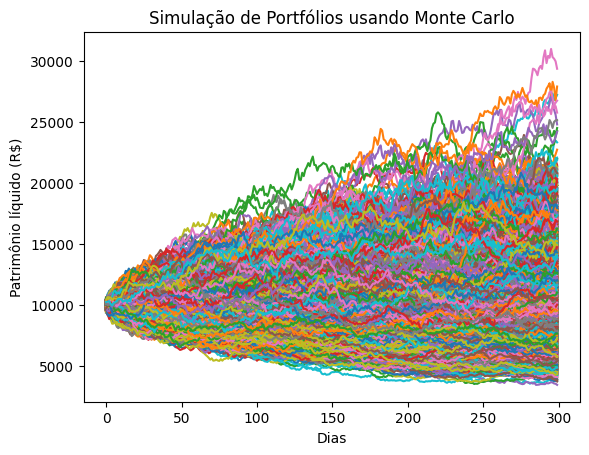

In [ ]:
plt.plot(portfolio_sims)
plt.ylabel('Patrimônio líquido (R$)')
plt.xlabel('Dias')
plt.title('Simulação de Portfólios usando Monte Carlo')
plt.show()

## 6. Isolando o portfólio vencedor

In [ ]:
retorno_portfolio = pd.DataFrame(portfolio_sims)

In [ ]:
retorno_portfolio

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,10101.299133,10080.347026,10309.163168,10017.902356,10010.683080,9991.140157,9867.678550,9807.568621,10030.866039,9863.868052,...,10089.286953,9887.391254,9990.672420,10393.743561,10066.081379,9742.258822,10292.302893,10132.563854,10415.798921,10235.950048
1,9927.559973,10033.750706,10533.184899,9874.576684,10134.014044,10097.091104,10056.085209,9780.275026,9841.343151,9990.304886,...,9986.511768,9805.915729,10094.331597,10324.173850,10134.156427,9944.908351,10240.687653,9991.668457,10649.078671,10266.540321
2,9763.934538,10147.910482,10458.905234,9905.413303,9989.471910,10042.677308,10137.766315,9708.867597,9674.657097,9988.875930,...,10055.934659,10022.384195,9904.159212,10131.662023,10025.901292,10009.046014,10307.757977,10063.221669,10596.968641,10305.700054
3,9635.521143,10100.227002,10756.143311,9980.313741,9949.622270,10066.590151,10067.439340,9880.288938,9468.493577,10142.080918,...,9786.045263,9995.127501,10110.835375,10193.737956,9981.082976,10051.710755,10389.078380,9981.715010,10603.008881,10080.325085
4,9319.593748,10193.702936,10620.283257,9778.704938,9979.651822,10032.862402,9833.165295,9950.891717,9630.688494,10113.894227,...,9387.824923,10306.170518,9906.439087,10514.307046,9844.397809,10038.313399,10379.142891,10020.890421,10379.983349,9950.593190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,10179.763198,8497.179679,11365.812155,10096.427936,9757.760521,14263.471396,4308.661136,8042.579247,6849.621952,12189.361211,...,12123.610861,9355.084307,7247.277453,10522.087701,13372.543669,10507.356838,9121.630802,8488.731551,15319.848870,12748.975050
296,10181.500069,8343.757476,11586.599180,10306.930635,9620.603202,13998.383958,4243.943487,8129.995271,6705.528219,12238.584274,...,11972.925242,9487.693266,7369.046776,10574.549724,13434.737550,10354.908501,9236.283531,8377.821837,15253.963463,12983.966849
297,9965.583629,8249.561163,11823.605078,10335.099615,9598.168855,13989.230881,4288.033231,8133.967302,6959.619926,12648.884162,...,12044.868494,9605.188503,7486.274920,10496.979970,13418.933373,10462.512707,9313.599106,8345.415919,14876.174849,13301.966823
298,10107.100869,8138.784614,11819.230049,10477.061004,9617.809369,13647.269962,4311.105522,8189.514435,7038.482331,12766.704489,...,11969.565621,9642.650292,7629.794466,10522.406324,13664.462151,10460.311647,9293.060090,8350.201110,15272.506917,13761.663322


In [ ]:
retorno_portfolio.iloc[-1].sort_values()

1224     3441.703724
3415     3716.502900
8025     3788.611948
479      3791.818382
5635     3868.145017
            ...     
7636    25782.737271
7996    26764.590953
1429    27243.937827
4521    27926.228412
3996    29383.283130
Name: 299, Length: 10000, dtype: float64

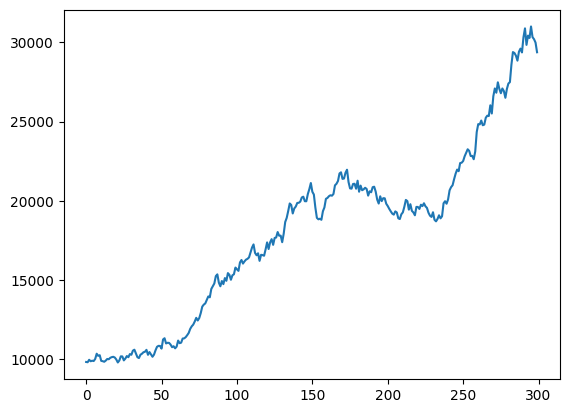

In [ ]:
retorno_portfolio[3996].plot();